<img src="nebrija.jpg" alt="drawing" width="200" align="center"/>

**Las Herramientas del Científico de Datos**
# Caso Práctico Final Python

# El Problema

## Contexto
El Informe Mundial de la Felicidad es una encuesta histórica sobre el estado de la felicidad global. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la actualización de 2016. El World Happiness 2017, que clasifica a 155 países según sus niveles de felicidad, se lanzó en las Naciones Unidas en un evento que celebra el día internacional de la felicidad el 20 de marzo. El informe continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar de sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones de bienestar se pueden usar de manera efectiva para evaluar el progreso de las naciones.

## Contenido
Los puntajes y clasificaciones de felicidad utilizan datos de la encuesta mundial Gallup. Las puntuaciones se basan en las respuestas a la pregunta principal de evaluación de la vida formulada en la encuesta. Esta pregunta, conocida como la escalera de Cantril, les pide a los encuestados que piensen en una escalera con la mejor vida posible para ellos con un 10 y la peor vida posible con un 0 y que califiquen sus propias vidas actuales en esa escala. Las puntuaciones provienen de muestras representativas a nivel nacional para los años 2013-2016 y utilizan los pesos de Gallup para hacer que las estimaciones sean representativas. Las columnas que siguen la puntuación de felicidad estiman el grado en que cada uno de los seis factores (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad) contribuyen a que las evaluaciones de vida sean más altas en cada país que en la distopía, un país hipotético que tiene valores iguales a los promedios nacionales más bajos del mundo para cada uno de los seis factores. No tienen impacto en el puntaje total reportado para cada país, pero sí explican por qué algunos países tienen una clasificación más alta que otros.

## ¿Qué es la distopia?
La distopía es un país imaginario que tiene las personas menos felices del mundo. El propósito de establecer la distopía es tener un punto de referencia con el que todos los países puedan ser comparados favorablemente (ningún país tiene un desempeño más pobre que la distopía) en términos de cada una de las seis variables clave, lo que permite que cada barra sea de ancho positivo. Las puntuaciones más bajas observadas para las seis variables clave, por lo tanto, caracterizan la distopía. La vida sería muy desagradable en un país con los ingresos más bajos del mundo, la esperanza de vida más baja, la generosidad más baja, la mayoría de la corrupción, la menor libertad y el menor apoyo social, en contraste con la utopía.

## Instrucciones del Problema
Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones:

* Cargar los dos CSV como datasets.
* Identificar las columnas de ambos datasets: ¿hay diferencias entre ambos?
* Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.
* Revisa el número de nulos que hay por cada columna, así como su porcentaje.
* Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).
* Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.
* Obtén un resumen estadístico del dataframe sin valores nulos.
* Muestra de forma gráfica la relación entre la familia y la salud.
* Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).
* Muestra la matriz de correlación del daframe.
* Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.
* ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.
* Muestra la distribución del grado de distopía en función de la región.

# Solución

### Carga del Juego de Datos
Comencemos por la parte más fundamental del ejercicio, cargar los juegos de datos que viene en formato `csv.`. Para facilitar el análisis lo haremos de forma que queden automaticamente como _dataframes_.

In [1]:
import pandas as pd
import numpy as np
data2015 = pd.read_csv("2015.csv")
data2016 = pd.read_csv("2016.csv")

Revisemos primero la estructura de ambos juegos de datos. Comenzaremos con un pequeño análisis preliminar para tener una idea muy general de la data. 

In [2]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [3]:
data2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
data2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


La estructura de datos del año 2015 es (relativamemte) sencilla. Las columnas incluyen identificación del país en cuestión, región geográfica a la que pertenece, rango de felicidad, puntaje de felicidad, error estándar, y luego vienen las seis variables que permiten calificar el total: producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad. Al final se incluye el residuo de Distopia que es el componente que no puede explicar el modelo (Helliwell, John F., Richard Layard, and Jeffrey Sachs, 2015). 

### Comparación de los Juegos de Datos
¿Son los dos juegos de datos similares? Exploremos el año 2016.

In [5]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Solo con ver la estructura del juego de datos del 2016 vemos que se incluyen dos variables nuevas: el intervalo inferior y el intervalo superior de confidencia. Otra diferencia notable es la eliminación de la columna de error estándar. 

| Variables Eliminadas  	| Variables Agregadas              	|
|-----------------------	|----------------------------------	|
| Standard Error (2o15) 	| Lower Confidence Interval (2016) 	|
|                       	| Upper Confidence Interval (2016) 	|

Antes de seguir veamos un poco el contenido de la información solo para comprobar que no hay cambios radicales en los mismos. 

In [6]:
data2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [7]:
data2016.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


Si bien el informe no lo explica del todo, la razón de agregar los intervalos de confidencia tiene que ver con las barras de intervalos de confidencia utilizadas en las visualizaciones del reporte de 2016 (Helliwell, J., Layard, R., y Sachs, J., 2016).

### Unión de Ambos Juegos de Datos
Para el tercer paso solicitado del trabajo, debemos unir ambos juegos de datos, a pesar de las diferencias que queden. 

In [8]:
frames = [data2015, data2016]
datatotal = pd.concat(frames)
datatotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        315 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    int64  
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         315 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        315 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     315 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Lower Confidence Interval      157 non-null    flo

Curiosamente, las columnas de `Lower Confidence Interval` y `Upper Confidence Interval` pasaron al final. Por efecto, **Pandas** hace un `outer join` de los juegos de datos a concatenar a menos que se especifique, y funciona similar al uso de `append` con `sort=FALSE` (Pandas Development Team, 2020).

### Revisando el Número de Nulos en el Juego de Datos Completo
Dado que hemos concatenado dos archivos con columnas diferentes, se han generado valores nulos en aquellas mismas que no se replican en el juego de datos opuesto. Los valores no nulos se ven al momento de generar la información de la estructura del juego de datos (en el punto anterior). Veamos más precisamente los valores nulos por cada columna. Utilizaremos una solución propuesta por Mark Needham, uno de los ingenieros de la base de datos gráfica Neo4j (Needham, M., 2017).

In [9]:
null_columns = datatotal.columns[datatotal.isnull().any()]
datatotal[null_columns].isnull().sum()

Standard Error               157
Lower Confidence Interval    158
Upper Confidence Interval    158
dtype: int64

El código anterior funciona de la siguiente manera. En la variable `null_columns` se crea un subconjunto de datos tomados del juego `datatotal` bajo el filtro de aquellos cualesquiera que cumplen la función de ser nulos. Este subconjunto se usa como índice del total de datos para sumar los nulos. Cómo el índice resulta de tres columnas, el método devuelve el nombre de las mismas y las instancias nulas, que en realidad son las mismas que aparecen cuando utilizamos `datatotal.info()`. 

Busquemos automatizar la impresión de los datos nulos con el porcentaje de cada caso de nulos.

In [10]:
import math 

i = datatotal.Country.count()
tab = datatotal[null_columns].isnull().sum()
for casos in range(0, len(tab)):
    print(tab[casos:casos + 1].to_string(), " - ", math.floor(tab[casos]/i*100), "%")

Standard Error    157  -  49 %
Lower Confidence Interval    158  -  50 %
Upper Confidence Interval    158  -  50 %


La razón por la que tuvimos que utilizar `to_string()` en `tab[casos:casos + 1].to_string()` es para evitar que **Pandas** despliegue el tipo de objeto en la impresión de **Jupyter Notebook** (Lollo, A, 2016). Podemos ver de los resultados que todas las variables tienen alrededor del 50% de sus valores nulos.

### Modificando Valores Nulos en las Columnas de Intervalo de Confidencia
El próximo paso es cambiar los valores nulos de las columnas `Lower Confidence Interval` y `Upper Confidence Interval` por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo). La respuesta más rápida es iterar por las filas de la columna y reemplazar valores nulos. Sin embargo Python se presta para programación funcional y existe una forma mejor de vectorizar el reemplazo de valores sin necesidad de iteración (Chum, E., 2019). 

In [12]:
import random
random.seed(50) # la edad del autor

# Los valores de relleno deben ejecutarse antes que la modificación o pierden valor
randlci = random.uniform(datatotal['Lower Confidence Interval'].min(), datatotal['Lower Confidence Interval'].max())
randuci = random.uniform(datatotal['Upper Confidence Interval'].min(), datatotal['Upper Confidence Interval'].max())

datatotal.loc[datatotal['Lower Confidence Interval'].isnull(), 'Lower Confidence Interval'] = randlci
datatotal.loc[datatotal['Upper Confidence Interval'].isnull(), 'Upper Confidence Interval'] = randuci

Podemos verificar el efecto de la modificación a través del histograma de ambas columnas y sus datos. 

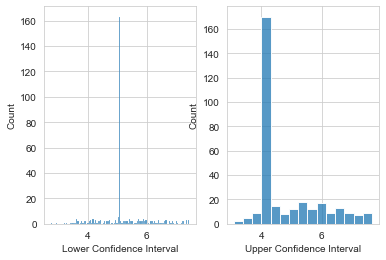

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2)
sns.histplot(datatotal['Lower Confidence Interval'], ax = ax[0])
sns.histplot(datatotal['Upper Confidence Interval'], ax = ax[1])
plt.show()

### Modificando Valores Nulos en la Columnas de Error Estándar
Este punto es muy similar al anterior, donde buscamos cambiar los valores nulos de la columna `Standard Error` por su media al cuadrado.

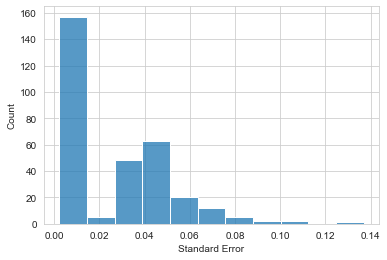

In [16]:
mac = np.square(datatotal['Standard Error'].mean())
datatotal.loc[datatotal['Standard Error'].isnull(), 'Standard Error'] = mac
sns.histplot(datatotal['Standard Error'])
plt.show()

### Revisando el Resumen Estadístico del Juego de Datos Total
Para obtener un resumen estadístico del dataframe sin valores nulos basta con utilizar la función `describe()` en el *dataframe*.

In [17]:
datatotal.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,5.183060,4.889113
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,0.815254,0.996026
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,5.084353,4.300004
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,5.084353,4.300004
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,5.231500,5.408500
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


### Analizando la Relación entre Familia y Salud
Ahora que tenemos un resumen estadístico completo, nos interesa comenzar a analizar de forma visual ciertas relaciones entre variables, como por ejemplo la relación entre la familia y la salud. La forma más sencilla de verificar estas es a través de un diagrama de dispersión donde se visualiza fácilmente las relaciones entre las dos variables. 

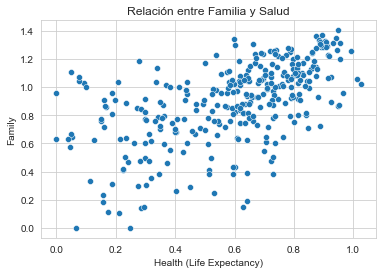

In [23]:
ax = sns.scatterplot(data=datatotal, x="Health (Life Expectancy)", y="Family")
ax.set_title("Relación entre Familia y Salud")
plt.show()

Aunque en el sector cercano a la ordenada y abscisas la información se ve bastante dispersa, moviendose hacia el exterior de los ejes es más fácil ver la relación directa y positiva de las dos variables. 

### Analizando la Relación entre Felicidad y Confianza
De acuerdo al reporte del año 2016, la confianza del mundo visto desde el punto de vista de corrupción gubernamental tiene un efecto de regresión entre -0,579 y -0,638 (Helliwell, J., Layard, R., y Sachs, J., 2016). La metodología del estudio es muy particular, sobre todo la construcción de la escalera, pero es de sentido común que debieramos ver un efecto donde a mayor felicidad, menor el grado de percepción de la corrupción y correspondiente mayor aumento de la confianza. 

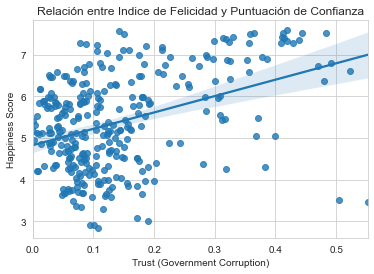

In [22]:
ax = sns.regplot(data=datatotal, x="Trust (Government Corruption)", y="Happiness Score")
ax.set_title("Relación entre Indice de Felicidad y Puntuación de Confianza")
plt.show()

La línea de la regresión marca una tendencia directa y positiva entre las variables dependientes (felicidad) e independiente (confianza), aunque no con una pendiente tan marcado como hubiera de pensarse originalmente.

### Análisis Multiple de Relaciones con Correlograma
La forma más sencilla de determinar el grado de relación entre dos variables en un esquema de múltiples variables es el uso del correlograma. En Python podemos tanto ver la matriz de correlación como visualizarla utilizando la biblioteca _Seaborn_.

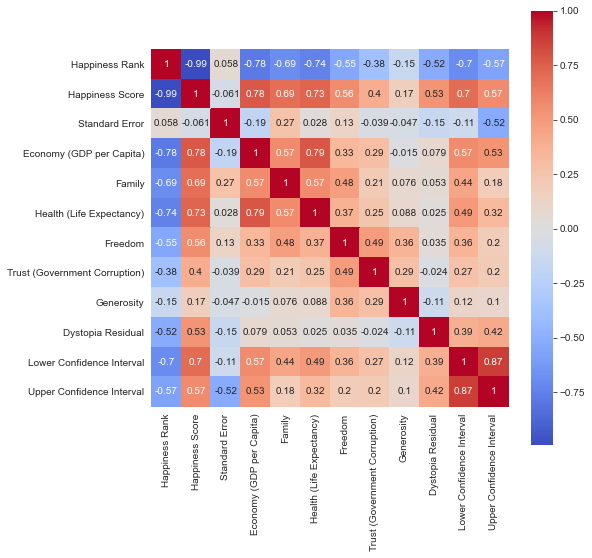

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(datatotal.corr(), annot = True, cmap = 'coolwarm', square = True)
plt.show()

Si tomamos como cierta la matriz de correlación que acabamos de generar, el índice más fuerte de correlación es aquel entre las variables `Happiness Score` y `Economy (GDP per Capita)` con un coeficiente de correlación de 0.78, lo que nos da a pensar que si bien el dinero no compra la felicidad, tiene un valor **R** notablemente alto en la ecuación.

### Valor Máximo de Puntaje de Felicidad Agrupado por País
Nuestro _dataframe_ `datatotal` tiene ciertas imperfecciones, resultado de haber unido a la fuerza dos conjuntos de datos diferentes. Tras unir los dataframes, los países aparecerán más de una vez. Busquemos la forma de mostrar agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [41]:
felicidad_maxima = datatotal.groupby('Country')['Happiness Score'].max()
print(felicidad_maxima.head(10))

Country
Afghanistan    3.575
Albania        4.959
Algeria        6.355
Angola         4.033
Argentina      6.650
Armenia        4.360
Australia      7.313
Austria        7.200
Azerbaijan     5.291
Bahrain        6.218
Name: Happiness Score, dtype: float64


Hagamos una pequeña prueba al azar para verificar que estamos imprimiendo el valor máximo de los dos posibles para un país cualquier de los que mostramos arriba.

In [42]:
datatotal[datatotal['Country'] == "Algeria"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
67,Algeria,Middle East and Northern Africa,68,5.605,0.050990,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,5.084353,4.300004
37,Algeria,Middle East and Northern Africa,38,6.355,0.002293,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,6.227000,6.483000


Como podemos ver, nuestro resultado tiene el puntaje 6,355 para Algeria, y no el valor inferior 5,605. 

### Relación entre Felicidad y Libertad y la Influencia de la Generosidad
¿Tiene relación la felicidad con la generosidad? Vamos a verificarlo gráficamente a través de la puntuación de libertad. Pensemos en la generosidad como una variable de confusión que nos permite verificar la exactitud de la relación entre las dos magnitudes previas (Velentgas P, Dreyer NA, Nourjah P, et al., 2013). La mejor forma de ver esta relación entre tres variables es asignar un valor de color y tamaño a `Generosity` que nos permita discernir el efecto de una tercer variable de las dos principales en los ejes de la ordenada y la abscisa. 

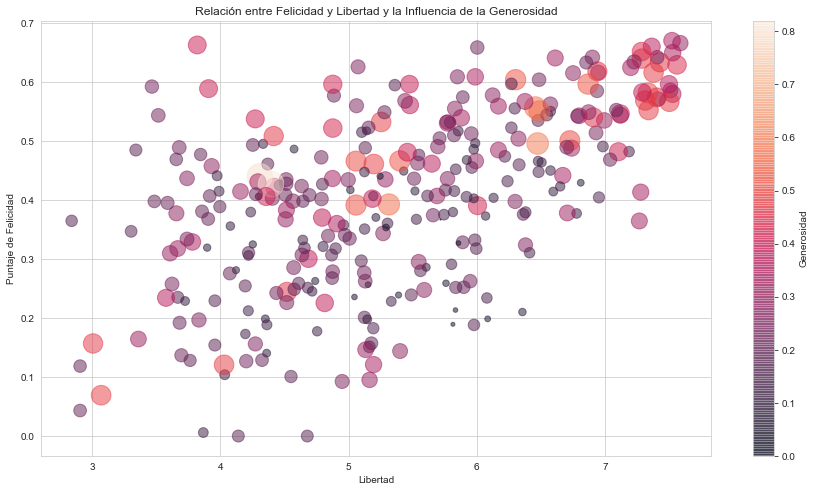

In [68]:
plt.figure(figsize=(15,8))
plt.scatter(datatotal['Happiness Score'], datatotal['Freedom'], s = (datatotal['Generosity'] * 800), 
                      alpha = 0.5, c = (datatotal['Generosity']))
plt.title("Relación entre Felicidad y Libertad y la Influencia de la Generosidad")
plt.ylabel("Puntaje de Felicidad")
plt.xlabel("Libertad")
plt.colorbar(label="Generosidad")
plt.show()

¿Podemos sacar una conclusión clara sobre la generosidad como variable de confusión en la relación felicidad y libertad? Mirando la visualización que acabamos de generar es discutible. Existen puntos de datos con altos índices de generosidad pero bajo puntaje de felicidad. De igual manera, hay países con altos niveles de felicidad y libertad pero magnitudes muy pequeñas de generosidad. Por lo menos en nuestra visualización, el punto queda sin comprobación y abierto a debate y técnicas superiores de análisis estadístico del efecto de la generosidad en la relación de felicidad y libertad.

### Distribución del Grado de Distopia en Función de la Región
Analicemos la distribución del grado de distopía en función de la región.

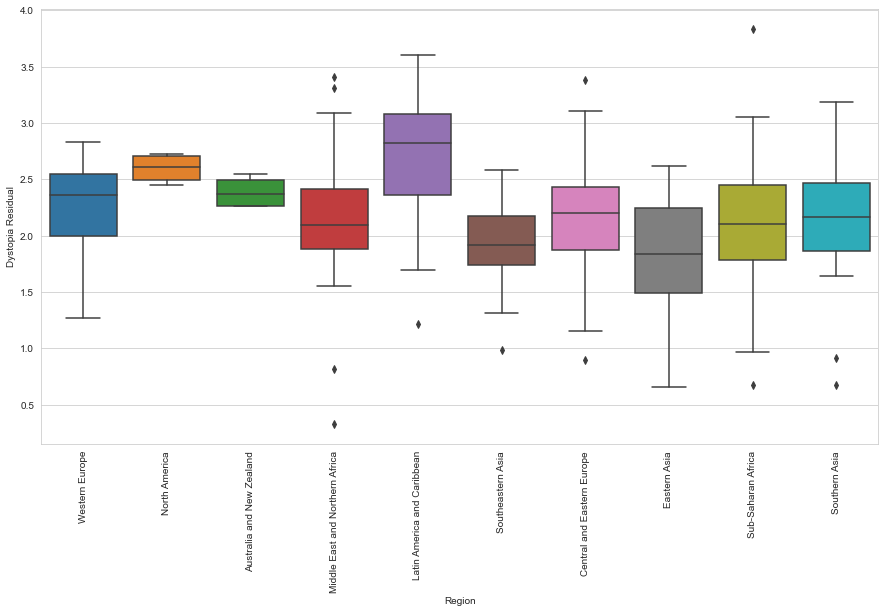

In [84]:
plt.figure(figsize=(15,8))
g = sns.boxplot(x = 'Region', y = 'Dystopia Residual', data = datatotal)
# Código para rotar etiquetas en el eje X
# https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

# Material de Referencia

Helliwell, John F., Richard Layard, and Jeffrey Sachs, (2015). _World Happiness Report 2015_. New York: Sustainable Development Solutions Network.

Helliwell, J., Layard, R., & Sachs, J. (2016). _World Happiness Report 2016, Update (Vol. I)_. New York: Sustainable Development Solutions Network.

Needham, M. (2017) Pandas: Find Rows Where Column/Field Is Null. NC, USA. _DZone Big Data Zone_. Recuperado el 9 de octubre del 2020 de https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null 

Lollo, A. (2016) Remove name, dtype from pandas output. CT, USA. _Stack Overflow_. Recuperado el 9 de octubre del 2020 de https://stackoverflow.com/questions/29645153/remove-name-dtype-from-pandas-output

Chum, E. (2019) Replace non Null values in column by 1. USA. _Stack Overflow_. Recuperado el 10 de octubre del 2020 de https://stackoverflow.com/questions/33218719/replace-non-null-values-in-column-by-1

Hetland, M. (2005) _Beginning Python_. New York, USA. Apress. 

Delaney JAC, Seeger JD. Sensitivity Analysis. In: Velentgas P, Dreyer NA, Nourjah P, et al., editors. _Developing a Protocol for Observational Comparative Effectiveness Research: A User's Guide_. Rockville (MD): Agency for Healthcare Research and Quality (US); 2013 Jan. Chapter 11. Recuperado el 10 de octubre del 2020 de  https://www.ncbi.nlm.nih.gov/books/NBK126178/

Martin, D. (2008) How to Rotate Axis Labels in Seaborn and Matplolib. _Drawing from Data_. USA. Recuperado el 10 de octubre del 2020 de https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

 > Ariel E. Meilij - Octubre 10, 2020